In [3]:
#we need to find if an applicant would get loan or not based on previous data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
raw_train = pd.read_csv('loan_train.csv')

In [6]:
df_train = raw_train.copy()

In [7]:
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


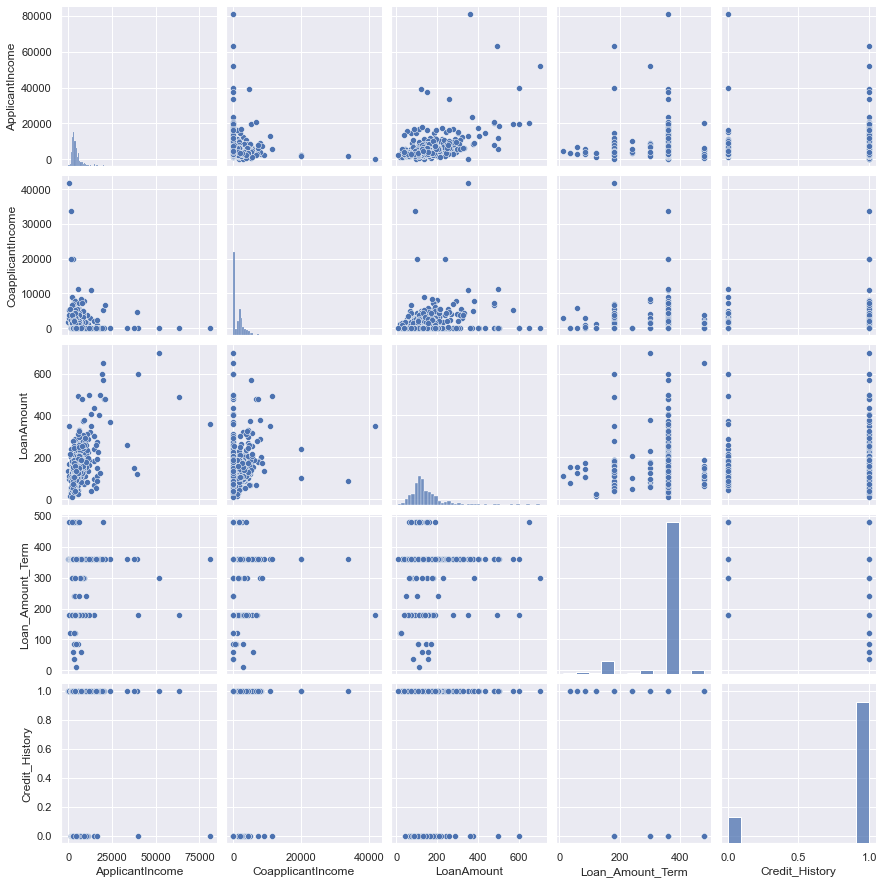

In [10]:
sns.pairplot(df_train)

In [11]:
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [12]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
type(df_train['Dependents'][0])

str

In [14]:
df_train['Dependents'] = df_train['Dependents'].map({'0':0,'1':1,'2':1,'3+':1})

In [15]:
df_train['Gender'] = df_train['Gender'].map({'Male':0,'Female':1})

In [16]:
df_train['Married'] = df_train['Married'].map({'No':0,'Yes':1})

In [17]:
df_train['Education'] = df_train['Education'].map({'Graduate':0,'Not Graduate':1})

In [18]:
df_train['Self_Employed'] = df_train['Self_Employed'].map({'No':0,'Yes':1})

In [19]:
df_train['Property_Area'] = df_train['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})

In [20]:
df_train['Loan_Status'] = df_train['Loan_Status'].map({'N':0,'Y':1})

In [21]:
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,0,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,0.0,1.0,1.0,0,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0.0,1.0,0.0,0,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0.0,1.0,0.0,1,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0.0,0.0,0.0,0,0.0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0.0,1.0,1.0,0,1.0,5417,4196.0,267.0,360.0,1.0,0,1
6,LP001013,0.0,1.0,0.0,1,0.0,2333,1516.0,95.0,360.0,1.0,0,1
7,LP001014,0.0,1.0,1.0,0,0.0,3036,2504.0,158.0,360.0,0.0,2,0
8,LP001018,0.0,1.0,1.0,0,0.0,4006,1526.0,168.0,360.0,1.0,0,1
9,LP001020,0.0,1.0,1.0,0,0.0,12841,10968.0,349.0,360.0,1.0,2,0


In [22]:
df_dummied = df_train.copy()

In [23]:
df_dummied = df_dummied.drop(['Loan_ID'],axis=1)

In [24]:
df_dummied.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.186356,0.651391,0.424040,0.218241,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.050489,0.687296
std,0.389718,0.476920,0.494609,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [25]:
df_dummied['LoanAmount'] = df_dummied['LoanAmount'].fillna(df_dummied['LoanAmount'].mean())

In [26]:
df_dummied['Loan_Amount_Term'] = df_dummied['Loan_Amount_Term'].fillna(df_dummied['Loan_Amount_Term'].mean())

In [27]:
df_dummied['Credit_History'] = df_dummied['Credit_History'].fillna(1)

In [28]:
df_dummied['Self_Employed'].value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [29]:
df_dummied['Self_Employed'] = df_dummied['Self_Employed'].fillna(1)

In [30]:
df_dummied['Gender'] = df_dummied['Gender'].fillna(0)

In [31]:
df_dummied = df_dummied.dropna(axis=0)

In [32]:
df_dummied.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,0.181970,0.651085,0.424040,0.217028,0.186978,5408.864775,1634.896361,146.803411,341.679466,0.859766,1.053422,0.689482
std,0.386142,0.477025,0.494609,0.412567,0.390220,6168.473138,2953.144575,84.886938,64.165892,0.347520,0.838348,0.463092
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2853.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3775.000000,1213.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5816.500000,2304.000000,165.500000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [33]:
df_dummied

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0,0.0,5849,0.0,146.412162,360.0,1.0,0,1
1,0.0,1.0,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0.0,1.0,0.0,0,1.0,3000,0.0,66.000000,360.0,1.0,0,1
3,0.0,1.0,0.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0.0,0.0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0,0.0,2900,0.0,71.000000,360.0,1.0,1,1
610,0.0,1.0,1.0,0,0.0,4106,0.0,40.000000,180.0,1.0,1,1
611,0.0,1.0,1.0,0,0.0,8072,240.0,253.000000,360.0,1.0,0,1
612,0.0,1.0,1.0,0,0.0,7583,0.0,187.000000,360.0,1.0,0,1


In [34]:
df_preprocessed = df_dummied.copy()

In [35]:
df_preprocessed

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0,0.0,5849,0.0,146.412162,360.0,1.0,0,1
1,0.0,1.0,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0.0,1.0,0.0,0,1.0,3000,0.0,66.000000,360.0,1.0,0,1
3,0.0,1.0,0.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0.0,0.0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0,0.0,2900,0.0,71.000000,360.0,1.0,1,1
610,0.0,1.0,1.0,0,0.0,4106,0.0,40.000000,180.0,1.0,1,1
611,0.0,1.0,1.0,0,0.0,8072,240.0,253.000000,360.0,1.0,0,1
612,0.0,1.0,1.0,0,0.0,7583,0.0,187.000000,360.0,1.0,0,1


In [36]:
df_preprocessed.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0,0.0,5849,0.0,146.412162,360.0,1.0,0,1
1,0.0,1.0,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0.0,1.0,0.0,0,1.0,3000,0.0,66.000000,360.0,1.0,0,1
3,0.0,1.0,0.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0.0,0.0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
594,1.0,0.0,0.0,0,0.0,2900,0.0,71.000000,360.0,1.0,1,1
595,0.0,1.0,1.0,0,0.0,4106,0.0,40.000000,180.0,1.0,1,1
596,0.0,1.0,1.0,0,0.0,8072,240.0,253.000000,360.0,1.0,0,1
597,0.0,1.0,1.0,0,0.0,7583,0.0,187.000000,360.0,1.0,0,1


In [37]:
target = df_preprocessed['Loan_Status']
unscaled_inputs = df_preprocessed.drop(['Loan_Status'],axis=1)

In [38]:
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 599, dtype: int64

In [39]:
unscaled_inputs

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,0,0.0,5849,0.0,146.412162,360.0,1.0,0
1,0.0,1.0,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,1
2,0.0,1.0,0.0,0,1.0,3000,0.0,66.000000,360.0,1.0,0
3,0.0,1.0,0.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,0
4,0.0,0.0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0,0.0,2900,0.0,71.000000,360.0,1.0,1
610,0.0,1.0,1.0,0,0.0,4106,0.0,40.000000,180.0,1.0,1
611,0.0,1.0,1.0,0,0.0,8072,240.0,253.000000,360.0,1.0,0
612,0.0,1.0,1.0,0,0.0,7583,0.0,187.000000,360.0,1.0,0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
scaler.fit(unscaled_inputs)

StandardScaler()

In [42]:
scaled_inputs = scaler.transform(unscaled_inputs)

In [43]:
unscaled_inputs

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,0,0.0,5849,0.0,146.412162,360.0,1.0,0
1,0.0,1.0,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,1
2,0.0,1.0,0.0,0,1.0,3000,0.0,66.000000,360.0,1.0,0
3,0.0,1.0,0.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,0
4,0.0,0.0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0,0.0,2900,0.0,71.000000,360.0,1.0,1
610,0.0,1.0,1.0,0,0.0,4106,0.0,40.000000,180.0,1.0,1
611,0.0,1.0,1.0,0,0.0,8072,240.0,253.000000,360.0,1.0,0
612,0.0,1.0,1.0,0,0.0,7583,0.0,187.000000,360.0,1.0,0


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_inputs,target,random_state=42,test_size=0.05)
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

In [45]:
classifier.score(X_train,y_train)

0.9912126537785588